<a href="https://colab.research.google.com/github/Devicharith/Task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Dataset has 2 features time he slept and then how much time he was active before another nap

In [ ]:
import pandas as pd
import numpy as np

Building the dataset 

Having no realtion
He sleeps for 5-6 hours and he can work for 8-15 hours

In [ ]:
import random
sleep = []
awake = []
for i in range(400):
  sleep.append(round(random.uniform(5,8), 2))
  awake.append(round(random.uniform(8,15), 2))

d = {'sleep':sleep,'awake':awake}
df = pd.DataFrame(d)
df.head()

,sleep,awake
0,6.96,8.57
1,5.47,9.25
2,6.95,10.00
3,6.78,10.05
4,6.71,11.97


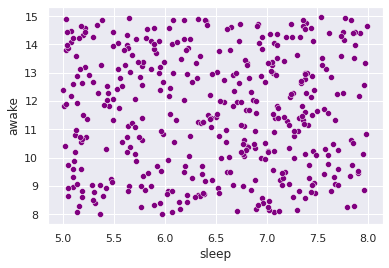

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="sleep", y="awake",color = 'purple')

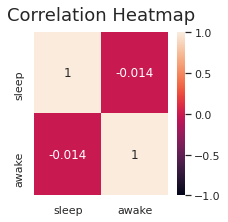

In [ ]:
plt.figure(figsize=(3,3))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Making a Linear relation

y = f(x) where f(x) = x*factor

In [ ]:
import random
sleep = []
awake = []
for i in range(400):
  sleep.append(round(random.uniform(1,8), 2))
  factor = round(random.uniform(1.25,1.75), 2)
  awake.append(sleep[-1]*factor)

d = {'sleep':sleep,'awake':awake}
df = pd.DataFrame(d)
df.head()

,sleep,awake
0,5.44,7.8880
1,1.40,1.8200
2,3.86,6.2146
3,5.44,7.7248
4,2.34,3.8610


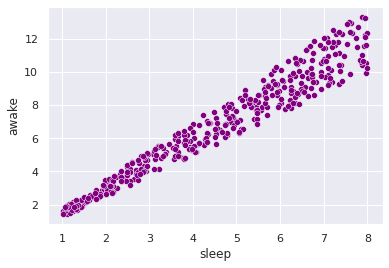

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="sleep", y="awake",color = 'purple')

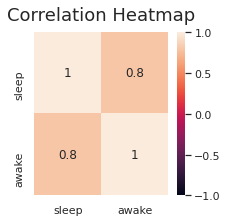

In [ ]:
plt.figure(figsize=(3,3))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Normal Distribution

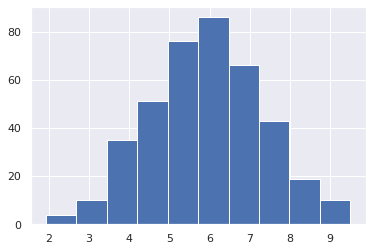

In [ ]:
from scipy.stats import truncnorm
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd )
X = get_truncated_normal(mean=6, sd=1.5, low=1, upp=10)
x=X.rvs(400)

import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

In [ ]:
y = []
for i in x:
  factor = round(random.uniform(1.5,1.8), 2)
  y.append(i*factor)

d = {'sleep':x,'awake':y}
df = pd.DataFrame(d)
df.head()

,sleep,awake
0,6.106637,10.930880
1,6.179886,10.753002
2,7.051595,11.212037
3,4.503017,7.159797
4,3.818596,5.957009


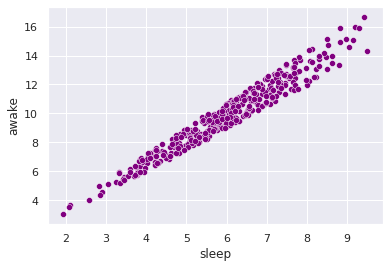

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="sleep", y="awake",color = 'purple')

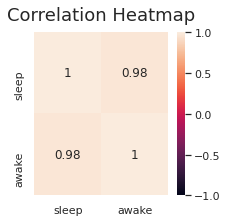

In [ ]:
plt.figure(figsize=(3,3))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
x,y = np.array(df['sleep']).reshape(-1,1),np.array(df['awake']).reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(y_train.shape)

(360, 1)


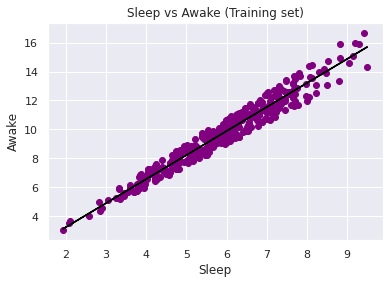

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'purple')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Sleep vs Awake (Training set)')
plt.xlabel('Sleep')
plt.ylabel('Awake')
plt.show()

Accuracy

In [ ]:
import sklearn
y_pred = regressor.predict(X_test)
sklearn.metrics.mean_absolute_error(y_test,y_pred)

0.5162570950388811

Pickling

In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))